# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [30]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    print(city)
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

port alfred
adamstown
adamstown
puerto aysen
bengkulu
touros
kijang
edinburgh of the seven seas
cody
fort mcmurray
tiksi
grytviken
port-aux-francais
ushuaia
tvoroyri
invercargill
adamstown
alavus
ushuaia
ushuaia
saipan
minas de marcona
codrington
yellowknife
aleksandrov gay
lerwick
sitka
hithadhoo
paracuru
hermanus
agustin codazzi
ribeira grande
port lincoln
grytviken
weno
saalfelden am steinernen meer
saldanha
saint-pierre
olonkinbyen
port-aux-francais
kapuskasing
idrinskoye
ilulissat
ribeira grande
ushuaia
puerto ayora
port-aux-francais
puerto natales
udachny
taiohae
iqaluit
kuta
grytviken
tralee
blackmans bay
kataragama
bongouanou
tokar
taiohae
blackmans bay
jabalpur
vingt cinq
mugia
argo
puerto natales
lorengau
jamestown
petropavlovsk-kamchatsky
tamanrasset
labrador city
waitangi
padang
richards bay
waitangi
port-aux-francais
waitangi
punta arenas
papatowai
edinburgh of the seven seas
east london
puerto baquerizo moreno
karratha
torres
westport
puerto natales
ouesso
longyearbyen
ta

arraial do cabo
sabang
fairbanks
gokwe
kotlas
remire-montjoly
adamstown
dudinka
invercargill
askoy
hadibu
adamstown
bethel
guantanamo
hamilton
yellowknife
vorgashor
port-aux-francais
papao
kalamata
ushuaia
port-aux-francais
adamstown
stanley
ordynskoye
gaigeturi
grytviken
ayang-ni
st. john's
blackmans bay
quellon
gannavaram
lebu
thompson
avarua
casa santa
waitangi
atafu village
verkhniy baskunchak
port-aux-francais
grytviken
constantia
blackmans bay
lihue
blackmans bay
kuala belait
anadyr
chonchi
stanley
grytviken
albany
vilyuchinsk
adamstown
correntina
nar'yan-mar
adamstown
peterhead
panjab
priob'ye
ushuaia
ilulissat
grytviken
lodja
gorey
aasiaat
al majaridah
bealanana
dryden
thompson
blackmans bay
gebeit
margaret river
selfoss
shenjiamen
isafjordur
port lincoln
keflavik
san luis de la loma
burutu
punta arenas
olonkinbyen
ilulissat
waitangi
puerto ayora
geraldton
talnakh
vadso
college
aasiaat
adamstown
vilyuchinsk
margaret river
taoudenni
hermanus
stanley
iqaluit
carnarvon
price
edinb

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [31]:
# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = 'imperial'
# city = 'albany'
# query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

# city_url = requests.get(query_url)
# city_weather = city_url.json()

# city_weather


In [32]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

units = 'imperial'
# Define an empty list to fetch the weather data for each city
city_data = []
# lats = []
# lons = []
# cloud = []
# dates = []
# humidity = []
# maxtemp = []
# wind = []
# countries = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    city_url = requests.get(query_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_url.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
#         city_date = # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
#                           "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | puerto aysen
Processing Record 4 of Set 1 | bengkulu
Processing Record 5 of Set 1 | touros
Processing Record 6 of Set 1 | kijang
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | cody
Processing Record 9 of Set 1 | fort mcmurray
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | tvoroyri
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | alavus
Processing Record 17 of Set 1 | saipan
Processing Record 18 of Set 1 | minas de marcona
Processing Record 19 of Set 1 | codrington
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | aleksandrov gay
Processing Record 22 of Set 1 | lerwic

Processing Record 36 of Set 4 | kaa-khem
Processing Record 37 of Set 4 | port de pollenca
Processing Record 38 of Set 4 | nyaungdon
Processing Record 39 of Set 4 | enewetak
Processing Record 40 of Set 4 | shubarshi
Processing Record 41 of Set 4 | laguna
Processing Record 42 of Set 4 | wailua homesteads
Processing Record 43 of Set 4 | atafu village
Processing Record 44 of Set 4 | oeiras do para
Processing Record 45 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 46 of Set 4 | sorong
Processing Record 47 of Set 4 | saint croix
Processing Record 48 of Set 4 | dolisie
Processing Record 49 of Set 4 | gobabis
Processing Record 0 of Set 5 | devinuwara
City not found. Skipping...
Processing Record 1 of Set 5 | tazacorte
Processing Record 2 of Set 5 | ankang
Processing Record 3 of Set 5 | nemuro
Processing Record 4 of Set 5 | tadine
Processing Record 5 of Set 5 | benjamin constant
Processing Record 6 of Set 5 | tolanaro
Processing Record 7 of Set 5 | revda
Processing Record 8 o

Processing Record 28 of Set 8 | inga
Processing Record 29 of Set 8 | mamontovo
Processing Record 30 of Set 8 | hinatuan
Processing Record 31 of Set 8 | kani keli
Processing Record 32 of Set 8 | tumpat
Processing Record 33 of Set 8 | florestopolis
Processing Record 34 of Set 8 | piechowice
Processing Record 35 of Set 8 | okha
Processing Record 36 of Set 8 | dakhla
Processing Record 37 of Set 8 | dire dawa
Processing Record 38 of Set 8 | tavistock
Processing Record 39 of Set 8 | kuzovatovo
Processing Record 40 of Set 8 | le port
Processing Record 41 of Set 8 | oroqen zizhiqi
Processing Record 42 of Set 8 | rio grande
Processing Record 43 of Set 8 | dadonghai
City not found. Skipping...
Processing Record 44 of Set 8 | princeville
Processing Record 45 of Set 8 | souillac
Processing Record 46 of Set 8 | sovetskiy
Processing Record 47 of Set 8 | mejit
Processing Record 48 of Set 8 | itororo
Processing Record 49 of Set 8 | nikolayevsk-on-amure
Processing Record 0 of Set 9 | acajutla
Processin

Processing Record 22 of Set 12 | verkhniy baskunchak
Processing Record 23 of Set 12 | kuala belait
Processing Record 24 of Set 12 | correntina
Processing Record 25 of Set 12 | peterhead
Processing Record 26 of Set 12 | panjab
Processing Record 27 of Set 12 | priob'ye
Processing Record 28 of Set 12 | gorey
Processing Record 29 of Set 12 | al majaridah
Processing Record 30 of Set 12 | bealanana
Processing Record 31 of Set 12 | dryden
Processing Record 32 of Set 12 | shenjiamen
Processing Record 33 of Set 12 | burutu
Processing Record 34 of Set 12 | taoudenni
Processing Record 35 of Set 12 | price
-----------------------------
Data Retrieval Complete      
-----------------------------


In [33]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
dtype: int64

In [34]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,port alfred,-33.5906,26.8910,77.18,47,67,1.99,ZA
1,adamstown,-25.0660,-130.1015,68.38,69,81,23.76,PN
2,puerto aysen,-45.4000,-72.7000,35.80,98,100,2.26,CL
3,bengkulu,-3.8004,102.2655,79.32,84,52,7.87,ID
4,touros,-5.1989,-35.4608,81.70,67,24,15.17,BR


In [35]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [63]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
0,port alfred,-33.5906,26.8910,77.18,47,67,1.99,ZA
1,adamstown,-25.0660,-130.1015,68.38,69,81,23.76,PN
2,puerto aysen,-45.4000,-72.7000,35.80,98,100,2.26,CL
3,bengkulu,-3.8004,102.2655,79.32,84,52,7.87,ID
4,touros,-5.1989,-35.4608,81.70,67,24,15.17,BR
...,...,...,...,...,...,...,...,...
560,dryden,49.7833,-92.7503,66.49,94,75,4.61,CA
561,shenjiamen,29.9576,122.2980,78.89,90,100,10.56,CN
562,burutu,5.3509,5.5076,86.13,63,83,10.74,NG


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

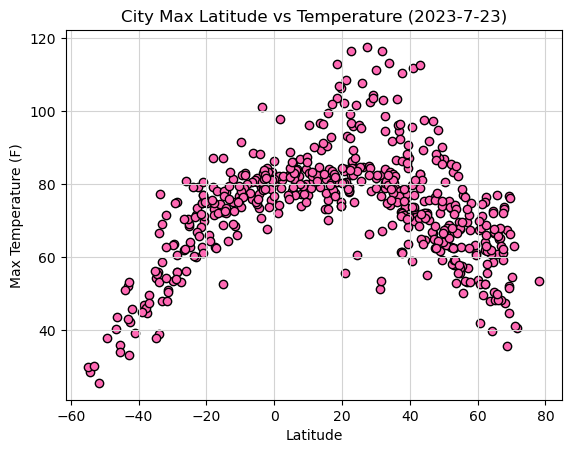

In [37]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black', facecolors='hotpink')

# Incorporate the other graph properties
plt.title('City Max Latitude vs Temperature (2023-7-23)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(which='major', axis='both', linestyle='-', color='lightgrey')
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

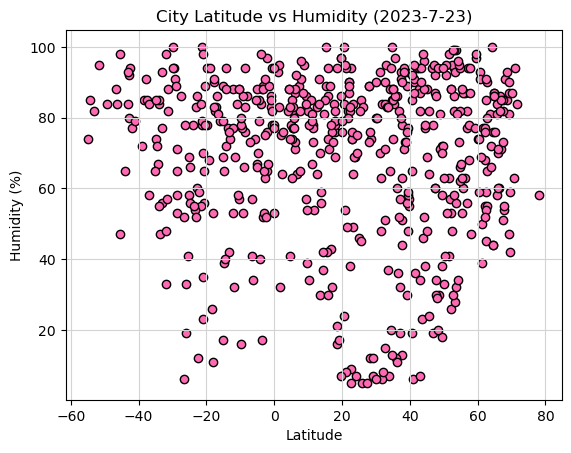

In [38]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black', facecolors='hotpink')

# Incorporate the other graph properties
plt.title('City Latitude vs Humidity (2023-7-23)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(which='major', axis='both', linestyle='-', color='lightgrey')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

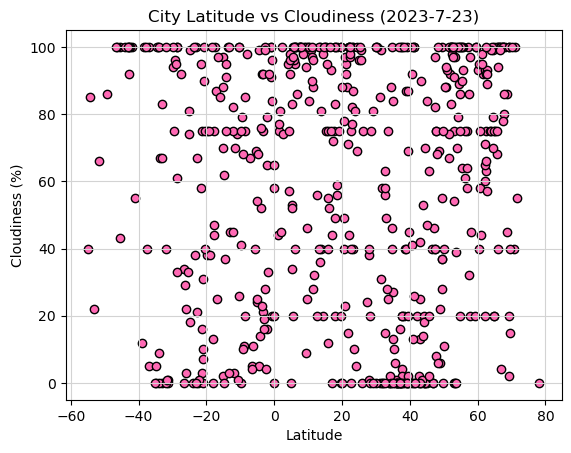

In [39]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black', facecolors='hotpink')

# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness (2023-7-23)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(which='major', axis='both', linestyle='-', color='lightgrey')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

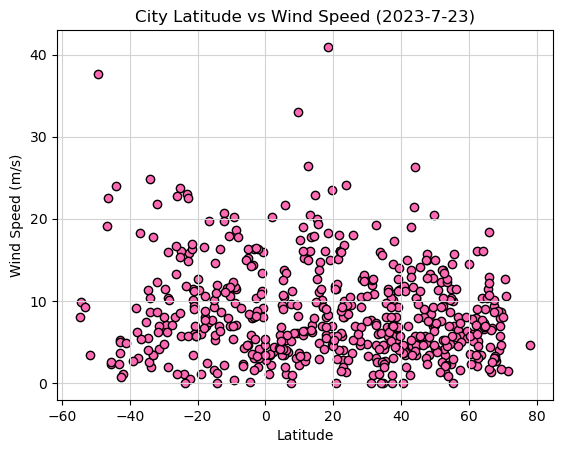

In [40]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black', facecolors='hotpink')

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed (2023-7-23)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(which='major', axis='both', linestyle='-', color='lightgrey')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [48]:
# Define a function to create Linear Regression plots
def line_reg(x,y,y_label, i, j):
    x_values = x
    y_values = y
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    reg_values = x_values*slope+intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r2 = (rvalue*rvalue)*100
    print(f'The r-value is {rvalue}')
    print(f'the r squared value is {r2}')
    plt.scatter(x_values, y_values)
    plt.plot(x_values, reg_values)
    plt.annotate(line_eq,(i,j),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_df = city_data_df.loc[(city_data_df['Lat']) > 0]

# Display sample data
north_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
2,high river,50.5834,-113.8687,82.69,25,72,16.35,CA
3,badger,64.8000,-147.5333,81.14,59,75,10.36,US
4,sinabang,2.4803,96.3801,79.21,85,100,3.62,ID
7,tiksi,71.6872,128.8694,41.86,74,54,3.02,RU
8,georgetown,5.4112,100.3354,81.01,89,20,2.30,MY


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_df = city_data_df.loc[(city_data_df['Lat']) < 0]

# Display sample data
south_df.count()

City          184
Lat           184
Lng           184
Max Temp      184
Humidity      184
Cloudiness    184
Wind Speed    184
Country       179
dtype: int64

###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.624310931214939
the r squared value is 38.976413883446426


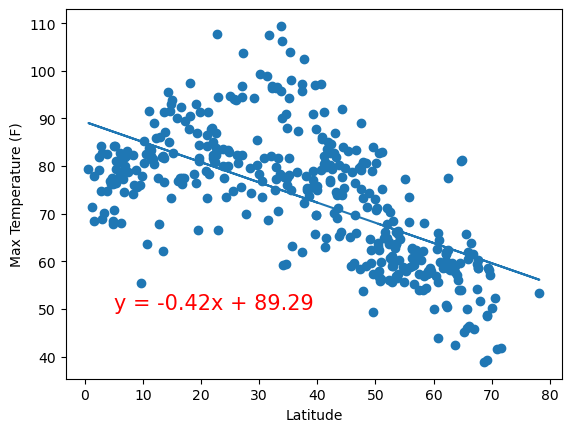

In [51]:
# Linear regression on Northern Hemisphere
line_reg(north_df['Lat'], north_df['Max Temp'], 'Max Temperature (F)', 5, 50)


The r-value is 0.8345290859356315
the r squared value is 69.64387952725606


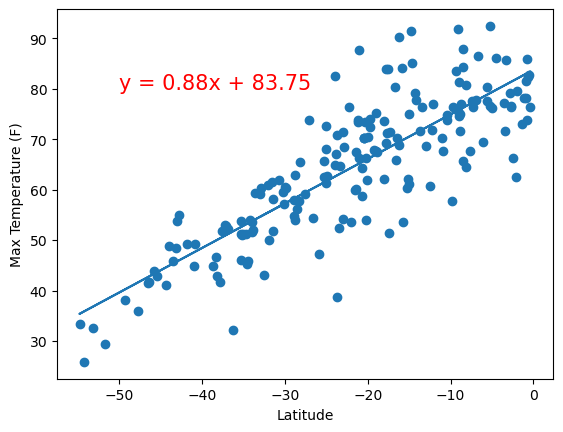

In [52]:
# Linear regression on Southern Hemisphere
line_reg(south_df['Lat'], south_df['Max Temp'], 'Max Temperature (F)', -50, 80)

**Discussion about the linear relationship:** Both R squared values show positive correlation and this relationship should be trusted for predictive modeling. Especially in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is -0.0010881900609527595
the r squared value is 0.00011841576087563703


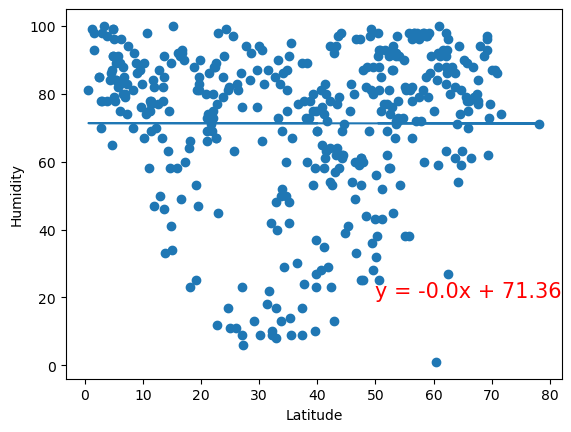

In [53]:
# Northern Hemisphere
line_reg(north_df['Lat'], north_df['Humidity'], 'Humidity', 50, 20)

The r-value is -0.09094617827355948
the r squared value is 0.8271207342566064


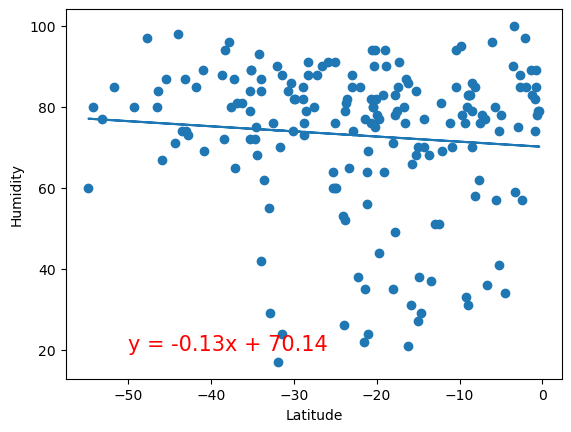

In [54]:
# Southern Hemisphere
line_reg(south_df['Lat'], south_df['Humidity'], 'Humidity', -50, 20)

**Discussion about the linear relationship:** Bot instances of regression return an r squared value of less than 1% which means there is no correlation and the predictive model is unreliable.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is -0.12398457304096921
the r squared value is 1.537217435215143


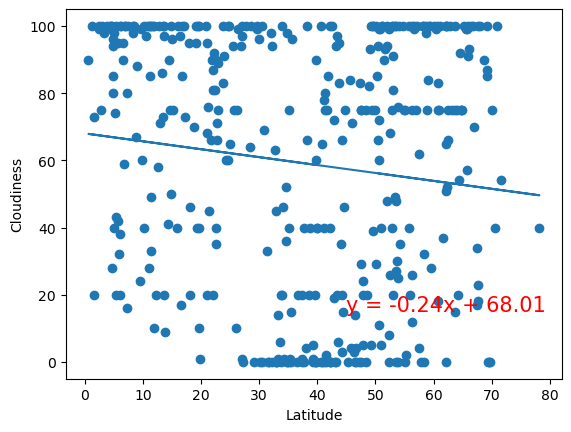

In [56]:
# Northern Hemisphere
line_reg(north_df['Lat'], north_df['Cloudiness'], 'Cloudiness', 45, 15)

The r-value is -0.1438301982608673
the r squared value is 2.068712593176039


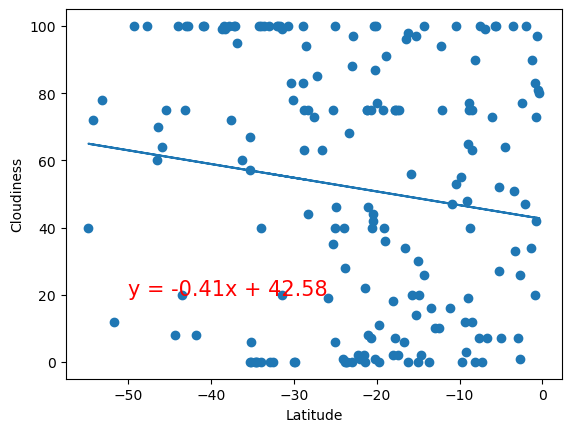

In [57]:
# Southern Hemisphere
line_reg(south_df['Lat'], south_df['Cloudiness'], 'Cloudiness', -50, 20)

**Discussion about the linear relationship:** Similarly, these relationships have very low r squared values and show no correlation. Completely unreliable for predictive modeling.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.12669963933382897
the r squared value is 1.6052798607322343


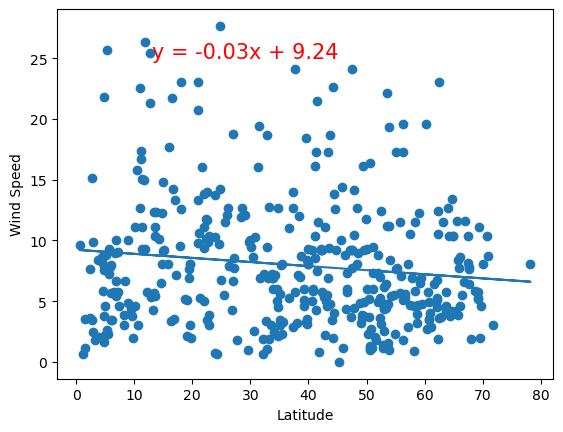

In [60]:
# Northern Hemisphere
line_reg(north_df['Lat'], north_df['Wind Speed'], 'Wind Speed', 13, 25)

The r-value is -0.03854666620831559
the r squared value is 0.14858454757752987


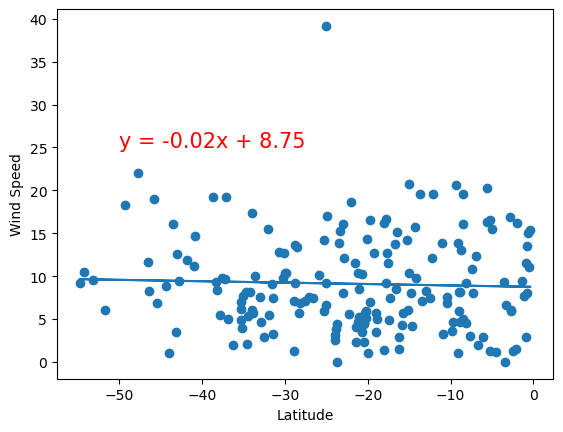

In [62]:
# Southern Hemisphere
line_reg(south_df['Lat'], south_df['Wind Speed'], 'Wind Speed', -50, 25)

**Discussion about the linear relationship:** With 2 more very low r squared values, we can see that Max Temp and Latitude are the only variables with corrolary relationship.